# Weather History Dataset

#### This dataset contains historical weather data, providing insights into various meteorological conditions.

## Key Columns and Units

* **Summary:** A brief textual description of the weather conditions.
* **Precip Type:** The type of precipitation, such as rain, snow, or sleet.
* **Temp:** Temperature in degrees Celsius (°C).
* **Apparent Temp:** The temperature felt by humans, accounting for factors like wind chill and humidity.
* **Humidity:** Relative humidity as a percentage.
* **Wind Speed:** Wind speed in kilometers per hour (km/h).
* **Wind Bearing:** Wind direction in degrees, where 0 degrees is North and 90 degrees is East.
* **Visibility:** Visibility distance in kilometers (km).
* **Loud Cover:** Cloud cover as a percentage.
* **Pressure:** Atmospheric pressure



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Summary,Precip Type,Temp,Apparent Temp,Humidity,Wind Speed,Wind Bearing,Visibility,Loud Cover,Pressure
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


# Data Cleansing

The next section will delve into the data cleansing process. This crucial step ensures that the data is accurate, consistent, and ready for exploratory data analysis (EDA). We will address potential issues such as:

* **Missing Values:** Identifying and handling missing data points, either by imputation (filling in missing values) or removal.
* **Outliers:** Detecting and potentially removing or adjusting extreme data points that may skew the analysis.
* **Inconsistencies:** Correcting errors in data entry, formatting, or units of measurement.
* **Duplicates:** Identifying and removing duplicate records.

By addressing these issues, we aim to improve the quality and reliability of the dataset, leading to more accurate and meaningful insights.

In [3]:
df['Loud Cover'].nunique()

1

In [4]:
# since Loud Cover column has the value of zero accross all dataset, it will be removed
df = df.drop('Loud Cover', axis=1)

In [5]:
# checking for duplicates
df.duplicated().sum()

72

In [6]:
# removing duplicated values
df.drop_duplicates(inplace=True)

In [7]:
# checking for null percentage accross all columns
round(df.isnull().sum()/len(df),2) 

Summary          0.00
Precip Type      0.01
Temp             0.00
Apparent Temp    0.00
Humidity         0.00
Wind Speed       0.00
Wind Bearing     0.00
Visibility       0.00
Pressure         0.00
dtype: float64

In [8]:
# there are more than one way to handle nulls, one of them is excluding them by filtering the data to exclude the null values
condition = df['Precip Type'].notnull()
df = df[condition]

In [9]:
df.isnull().sum()

Summary          0
Precip Type      0
Temp             0
Apparent Temp    0
Humidity         0
Wind Speed       0
Wind Bearing     0
Visibility       0
Pressure         0
dtype: int64

In [10]:
# checking for each datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95864 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Summary        95864 non-null  object 
 1   Precip Type    95864 non-null  object 
 2   Temp           95864 non-null  float64
 3   Apparent Temp  95864 non-null  float64
 4   Humidity       95864 non-null  float64
 5   Wind Speed     95864 non-null  float64
 6   Wind Bearing   95864 non-null  int64  
 7   Visibility     95864 non-null  float64
 8   Pressure       95864 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 7.3+ MB


In [11]:
df['Precip Type'].value_counts()

Precip Type
rain    85190
snow    10674
Name: count, dtype: int64

In [12]:
# first let's describe the data we're dealing with to understand some facts behind it before diving deeper
df.describe()

,Temp,Apparent Temp,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure
count,95864.000000,95864.000000,95864.000000,95864.000000,95864.000000,95864.000000,95864.000000
mean,11.944719,10.865971,0.734755,10.809458,187.524816,10.365299,1003.169823
std,9.566633,10.714451,0.195714,6.920174,107.372882,4.171916,117.185842
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.627778,2.283333,0.600000,5.812100,116.000000,8.372000,1011.890000
50%,12.033333,12.033333,0.780000,9.949800,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


## Data Cleaning: Handling Zero Values

Given the specific weather conditions (rain or snow) in our dataset, it's highly unlikely that values for wind speed, humidity, visibility, and pressure would be zero. Therefore, we will filter the dataset to exclude rows with zero values in these columns. 

This step ensures that our analysis is based on realistic and accurate weather data.

In [13]:
# Filter out rows with zero values in the specified columns
df = df[(df['Wind Speed'] != 0) & (df['Humidity'] != 0) & (df['Visibility'] != 0) & (df['Pressure'] != 0)]

In [14]:
# final view for the whole dataset before EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93165 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Summary        93165 non-null  object 
 1   Precip Type    93165 non-null  object 
 2   Temp           93165 non-null  float64
 3   Apparent Temp  93165 non-null  float64
 4   Humidity       93165 non-null  float64
 5   Wind Speed     93165 non-null  float64
 6   Wind Bearing   93165 non-null  int64  
 7   Visibility     93165 non-null  float64
 8   Pressure       93165 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 7.1+ MB


## Exploratory Data Analysis (EDA)

In this section, we will delve into exploratory data analysis to gain insights into the weather data. We will visualize the distribution of key variables, identify correlations, and explore potential relationships between different weather factors.

**Visualizations:**

* **Histograms:** Visualize the distribution of numerical variables like temperature, humidity, and wind 
  speedViolin* **Box plots:** Identify outliers and understand the spread of numerical var
 
* **Bar Plot:** Shows the values for the precpiation types accross the whole data.
 elationships.
* **Heatmap:** Visualize the correlation matrix to identify significant
   correlations.

By conducting this exploratory analysis, we aim to uncover patterns, trends, and anomalies in the weather data that will inform further analysis and modeling.and modeling.

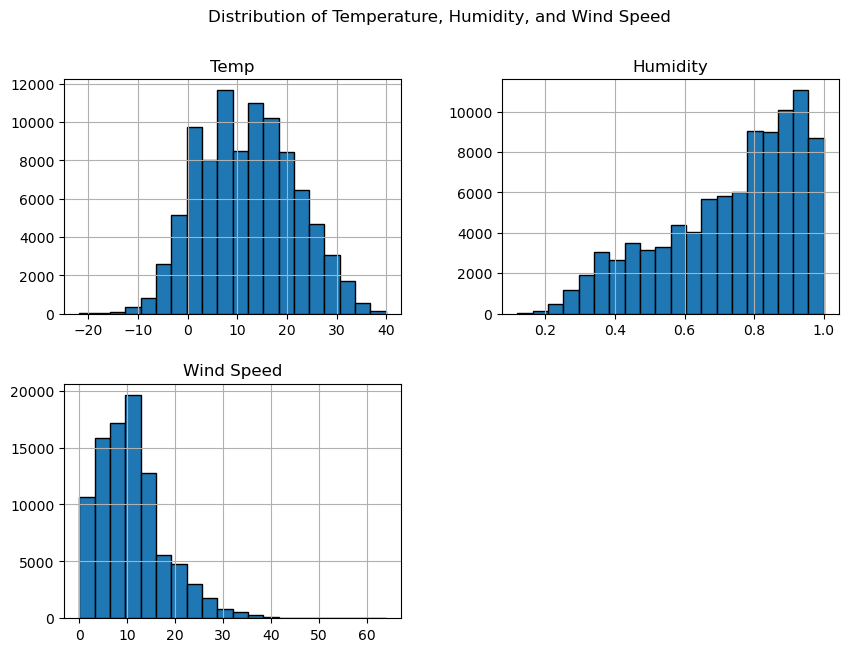

In [15]:
# histograms for Temperature, Humidity, and Wind Speed
df[['Temp', 'Humidity', 'Wind Speed']].hist(bins=20, figsize=(10, 7), edgecolor='black')
plt.suptitle("Distribution of Temperature, Humidity, and Wind Speed")
plt.show()

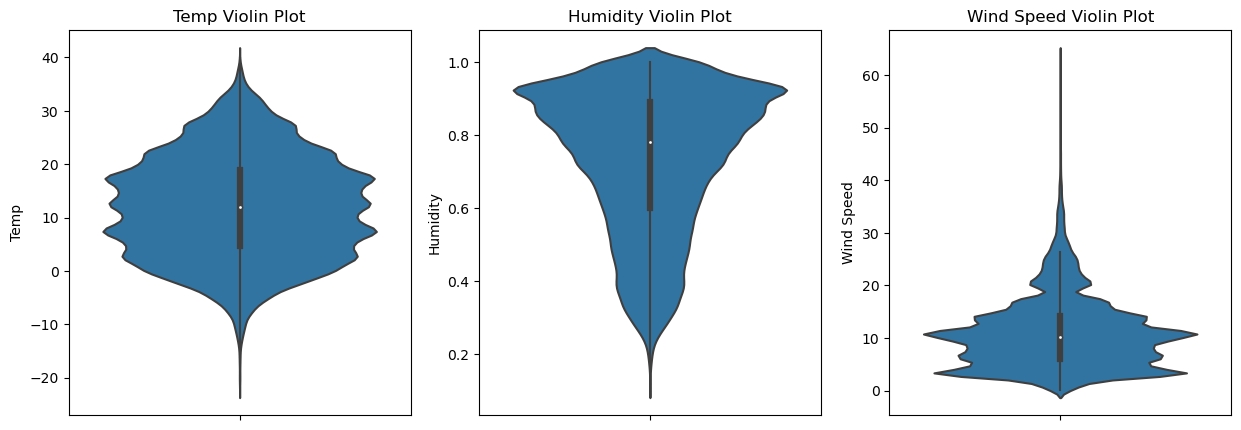

In [16]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(['Temp', 'Humidity', 'Wind Speed'], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(y=df[column])
    plt.title(f'{column} Violin Plot')
plt.show()

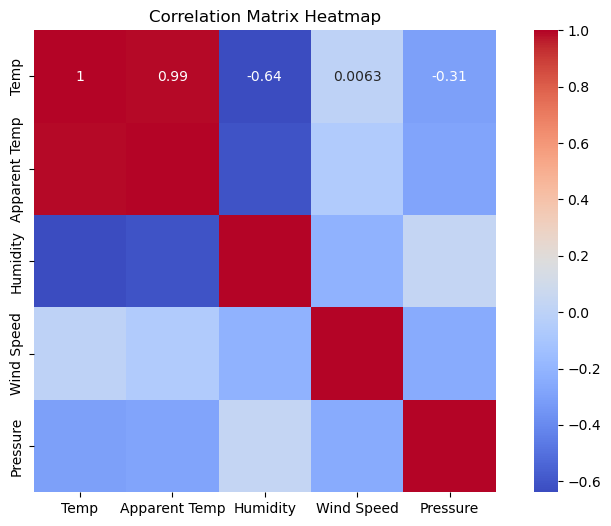

In [17]:
# Heatmap for correlations
correlation_matrix = df[['Temp', 'Apparent Temp', 'Humidity', 'Wind Speed', 'Pressure']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

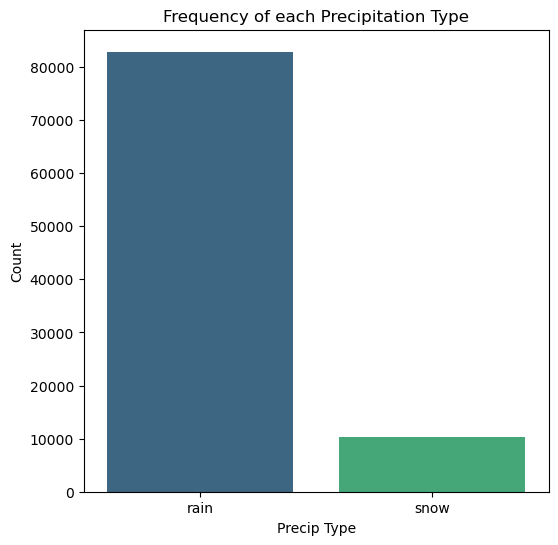

In [18]:
# variation of the precipiation type in the whole dataset, which shows dominance in the rain type over snow 
plt.figure(figsize=(6, 6))
sns.countplot(x='Precip Type', data=df, palette='viridis')
plt.title('Frequency of each Precipitation Type')
plt.xlabel('Precip Type')
plt.ylabel('Count')
plt.show()

In [19]:
# saving the cleaned data to a new file for modeling
df.to_csv('weather_model.csv',index=False)

In [20]:
df.head()

,Summary,Precip Type,Temp,Apparent Temp,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
